# Spectral Analysis Toolkit

[GH issue #487](https://github.com/NCAR/geocat-comp/issues/487) (research) and [#124](https://github.com/NCAR/geocat-comp/issues/124) (implementation)

## Functions

### Built-In Functions (seem possible in existing Python ecosystem):

 - [`specx_anal(x, iopt, jave, pct)`](https://www.ncl.ucar.edu/Document/Functions/Built-in/specx_anal.shtml) Calculates spectra of a series
 - [`specxy_anal(x, y, iopt, jave, pct)`](https://www.ncl.ucar.edu/Document/Functions/Built-in/specxy_anal.shtml) Calculates cross spectra quantities (Essentially same fx but for 2D)

Inputs:

 - `x`, `y`: 1-D arrays (of the same length)
 - `iopt`: Detrending scalar (kwarg candidate)
   -  0 -> remove mean
   - 1 -> remove mean and least squares linear trend
 - `jave`: odd-numbered smoothing scalar (kwarg candidate)
   -  < 3 -> no smoothing
   -  <plain>></plain> 3 -> Daniell smoothing
 - `pct`: Percent of series to be tapered (between 0 and 1, typically 0.1) (kwarg candidate)

Return:

 - `sdof`: A scalar representing the degrees of freedom

And the following attributes:

 - `spcx` , `spcy`: 1-D arrays of length N/2, units are variance/(unit frequency interval)
 - `frq`: 1-D array of length N/2 representing frequency (cycles/time)
 - `bw`: Scalar representing the spectral bandwidth
 - `xavei`, `yavei`: Scalar representing the average of the `x` or `y` series on input
 - `xvari`, `yvari`: Scalar representing the variance of the `x` or `y` series on input
 - `xvaro`, `yvaro`: Scalar representing the variance of the `x` or `y` series after detrending
 - `xlag1`, `ylag1`: Scalar representing the lag-one autocorrelation of the `x` or `y` series after detrending.
 - `xslope`, `yslope`: Scalarrepresenting the least-squares slope per time interval of linear trend (if `iopt` == 1) of the `x` or `y` series

`specxy_anal`-only attributes:

 - `cospc`: 1-D array of length N/2 representing the cospectrum (real cross spectrum). It measures the extent to which there are oscillations with the same phase in the two series
 - `quspc`: 1-D array of length N/2 representing the quadrature spectrum (imaginary cross spectrum). It measures the extent to which there are oscillations with a phase difference of a quarter cycle in either direction
 - `coher`: 1-D array of length N/2 representing coherence squared 
 - `phase`: 1-D array of length N/2 representing the phase in degrees
   - positive -> x leads y
   - negative -> y leads x
 - `coher_probability`: Array of length 4 containing the coherence corresponding to the 90, 95, 99, and 99.9% levels

Notes:

$spcx(0) - spectral estimate at frequency = (1/N)$

$spcx(N/2-1)- spectral estimate at frequency = 0.5$

Spectra have been normalized so that the area under the curve:

$(spcx(0)+spcx(N/2-1))*(df/2) + SUM{spcx(n)*df}$ equals the variance of the detrended series, <br>
where $df=(1/N)$ equals frequency spacing <br>
and $n= [1 : N/2-2]$

NCL References:

 - [Dennis Hartmann](http://www.atmos.washington.edu/~dennis/552_Notes_6c.pdf), See Table 6.2 , page 187 and the associated caption on page 186

<img src='atmos-dennis.png' width="500"><br>
"Table 6.2 shows the value of the coherence squared, or coherency, that must be attained
to reject a null hypothesis of zero coherency at various probability points from 50% to
99.9%. These are given as a function of the number of degrees of freedom from 2 to 200.
For example, for a confidence level of 95%, and with 10 degrees of freedom, the
coherence-squared must exceed 0.283 to reject a null hypothesis of zero coherency. The
ultimate source for this table is a Sandia monograph by Amos and Koopmans(1963)."

 - [Paul R. Julian, Comments on the Determination of Significance Levels of the Coherence Statistic](https://journals.ametsoc.org/view/journals/atsc/32/4/1520-0469_1975_032_0836_cotdos_2_0_co_2.xml), J. of Atm. Sci. 1975, Volume 32, pp 836-837.

"It is the purpose of this note to draw attention to the fact that the Panofsky and Brier (P-B) formula is correct only if the correct interpretation of the quantities 'degrees of freedom' and 'coherence' are made."
1. 'Coherence square' or 'squared coherence' are sometimes refered to as 'the coherence', but the formula takes the square root of those quantities.
2. "Blackman and Tukey (B-T) defined 'degreees of freedm' (df) by noting that each Fourier harmonic has two df and then concern themselves with the effective number of Fourier harmonics in the appropriate spectral window. Alternatively, Goodman (G), and Amos and Koopmans (A-K) define the independent quantity or the argument of the quantitative distribution of the coherence statsitic, as simply the effective number of Fourier components in the spectral window." So the df in B-T is twice that in G or A-K.

- [Rory O. R. Y. Thompson, Coherence Significance Levels](https://journals.ametsoc.org/view/journals/atsc/36/10/1520-0469_1979_036_2020_csl_2_0_co_2.xml?tab_body=pdf), J. of Atm. Sci. 1979 Volume 36, pp 2020-2021

Some complicated central limit thereom math and "pre-whitening" of spectra to bring it closer to the "ideal case" before doing Monte Carlo agreement.

### Shea-Util Functions (missing pieces to be implemented -  [NCL code](https://github.com/NCAR/ncl/blob/master/ni/src/examples/gsun/shea_util.ncl)):

 - [`specx_ci()`](https://www.ncl.ucar.edu/Document/Functions/Shea_util/specx_ci.shtml) Calculates the theoretical Markov spectrum and the lower and upper confidence curves
 ". . . using the <b>lag-1 autocorrelation</b> (`xlag1`?) returned as an attribute by the NCL functions specx_anal or specxy_anal."

```
******************** NOTE *******************************
; These are my personal functions/procedures. They do things
; the way I want them. If u want to modify one to suit
; your tastes then I suggest u copy this file or an 
; individual routine, rename it and then modify it as u wish.
; 
; I will try to help people out but these routines are NOT
; meant to be general purpose.
```

Inputs:

 - `sdof`: A degrees of freedom array returned from `specx_anal` or `specxy_anal`
 - `lowval`: The lower confidence limit (between 0 and 1, typically 0.05) (kwarg candidate)
 - `highval`: The upper confidence limit (between 0 and 1, typically 0.95) (kwarg candidate)

Return:

A 4xN 2-D array where N is the size of `sdof`, and the 4 curves are:

 - input spectrum
 - Markov "Red Noise" spectrum
 - lower confidence bound for Markov
 - upper confidence bound for markov

```
; Sample usage:
;        (1) sdof = specx_anal(x,d,sm,pct) ; see documentation
;        (2) splt = djs_specx_ci(sdof, 0.05, 0.95) 
;        (3) plot = gsn_csm_xy(wks, sdof@frq, splt,res) 
```

### The code

#### What is the Markov Spectrum?

### Further reading

[`xrft` Fourier transforms for Xarray data package](https://xrft.readthedocs.io/en/latest/index.html) (recommended by Anderson)

Robust, uses Dask, Earth-science designed.

Limitations -- "xrft currently only supports discrete fourier transforms. We plan to implement discrete sinusoid tranforms in the near future."

[Inferene from Data and Models](https://ocw.mit.edu/courses/12-864-inference-from-data-and-models-spring-2005/pages/lecture-notes/) (linked by Deepak, expresses surprise that this blackman-turkey is used "this millenium")

Lecture notes from a whole semester course at Cambridge from Frequency Domain Formulation, to Time Domain Methods, to Examples of Applications in Climate (chapter headings). Did not do the deep dive on all of these chapters, but a good resource to keep in mind.

[Lesson on Spectral Analysis (including smoothing)](https://online.stat.psu.edu/stat510/book/export/html/673)

Lecture notes from a lesson on estimation of spectral density using Daniell kernel & modified Daniell kernel, bandwith interpretation, and estimate parametrically.

[Introduction to Spectral Analysis](https://faculty.washington.edu/dbp/PDFFILES/GHS-AP-Stat-talk.pdf)

Vaguelly familiar information on fourier transforms and spectral analysis.

### GH Conversation Tidbits:
<img src="Screen Shot 2023-11-30 at 1.58.00 PM.png" width=800>

<img src="Screen Shot 2023-11-30 at 2.00.06 PM.png" width=800>

## Scripts:

 - [`spec_1.ncl`](https://www.ncl.ucar.edu/Applications/Scripts/spec_1.ncl) (simplest, no confidence intervals or detrending)
 - [`spec_4.ncl`](https://www.ncl.ucar.edu/Applications/Scripts/spec_4.ncl)
 - [`spec_5.ncl`](https://www.ncl.ucar.edu/Applications/Scripts/spec_5.ncl) (variation of spec_4)

Overalll [NCL Applications page](https://www.ncl.ucar.edu/Applications/spec.shtml)

### Spec_1.ncl in Python

Target image: <br>
<img src='https://www.ncl.ucar.edu/Applications/Images/spec_1_lg.png' width=500>

In [1]:
# Test notebook might not live here when done (applications?)

In [2]:
import xarray as xr
import geocat.datafiles as gcd

#### Variable and File Handling

In [4]:
soi_darwin = xr.open_dataset(gcd.get('netcdf_files/SOI_Darwin.nc'))

In [5]:
soi_darwin

<xarray.Dataset>
Dimensions:  (time: 1404)
Coordinates:
  * time     (time) int32 0 1 2 3 4 5 6 7 ... 1397 1398 1399 1400 1401 1402 1403
Data variables:
    date     (time) float64 ...
    DSOI     (time) float32 ...
Attributes:
    title:          Darwin Southern Oscillation Index
    source:         Climate Analysis Section, NCAR
    history:        \nDSOI = - Normalized Darwin\nNormalized sea level pressu...
    creation_date:  Tue Mar 30 09:29:20 MST 1999
    references:     Trenberth, Mon. Wea. Rev: 2/1984
    time_span:      1882 - 1998
    conventions:    None

In [6]:
soi = soi_darwin.DSOI
soi

<xarray.DataArray 'DSOI' (time: 1404)>
[1404 values with dtype=float32]
Coordinates:
  * time     (time) int32 0 1 2 3 4 5 6 7 ... 1397 1398 1399 1400 1401 1402 1403
Attributes:
    short_name:  DSOI
    long_name:   Darwin Southern Oscillation Index
    units:       dimensionless

### Make time index correct

In [33]:
soi_darwin.date

<xarray.DataArray 'date' (time: 1404)>
[1404 values with dtype=float64]
Coordinates:
  * time     (time) int32 0 1 2 3 4 5 6 7 ... 1397 1398 1399 1400 1401 1402 1403
Attributes:
    short_name:  Yr-Mo
    long_name:   Year-Month
    units:       YYYYMM

In [29]:
soi_darwin.indexes['time']

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403],
           dtype='int64', name='time', length=1404)

Haven't seen this time indexing before, https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.Int64Index.html
Doesn't seem to be in YYYYMM, is it months since a scertain date?

In [30]:
soi_darwin.indexes['time'].to_datetimeindex()

AttributeError: 'Int64Index' object has no attribute 'to_datetimeindex'

#### Remove Mean (with Option to Detrend)

In [8]:
mean = soi.mean()
soi_sansmean = soi - mean

soi_sansmean

<xarray.DataArray 'DSOI' (time: 1404)>
array([-0.00505698,  0.39494303,  0.19494303, ...,  1.094943  ,
        1.594943  ,  1.294943  ], dtype=float32)
Coordinates:
  * time     (time) int32 0 1 2 3 4 5 6 7 ... 1397 1398 1399 1400 1401 1402 1403

#### Smoothing

In [ ]:
# ; smoothing periodogram: (0 <= sm <= ??.) should be at least 3 and odd (what does a smooth of 7 mean??)
#  sm = 7

#### Tapering

In [ ]:
# ; percent tapered: (0.0 <= pct <= 1.0) 0.10 common. 
#  pct = 0.10

#### Calculate Spectrum

In [ ]:
# Variance

#### Plotting

In [23]:
import matplotlib.pyplot as plt

### Messing around with `scipy.fft.fft()`

In [9]:
import scipy

In [14]:
scipy.fft.fft(soi.values)

array([   7.0999956 -0.j       , -135.85774   +5.4438305j,
       -102.825226 -36.200974j , ...,   44.150803 +56.94406j  ,
       -102.825226 +36.200974j , -135.85774   -5.4438305j],
      dtype=complex64)

In [15]:
scipy.fft.fft(soi_sansmean.values)

array([ 1.6689301e-05 -0.j      , -1.3585774e+02 +5.443831j,
       -1.0282523e+02-36.200974j, ...,  4.4150803e+01+56.94406j ,
       -1.0282523e+02+36.200974j, -1.3585774e+02 -5.443831j],
      dtype=complex64)

### Exploring `xrft`

In [16]:
import xrft

In [18]:
dft = xrft.dft(soi) # Fourier Transform w/ consideration of phase
dft

/Users/jkent/miniconda3/envs/geocat_sandbox/lib/python3.10/site-packages/xrft/xrft.py:248: FutureWarning: This function has been renamed and will disappear in the future. Please use `fft` instead
  warnings.warn(msg, FutureWarning)


<xarray.DataArray (freq_time: 1404)>
array([ -3.09999949+1.06581410e-14j, -12.70682733+3.83519365e+00j,
       -19.14611395+1.95387644e+01j, ..., -26.9695282 +1.32122875e+01j,
       -19.14611395-1.95387644e+01j, -12.70682733-3.83519365e+00j])
Coordinates:
  * freq_time  (freq_time) float64 -0.5 -0.4993 -0.4986 ... 0.4979 0.4986 0.4993

In [20]:
dft_detrend = xrft.dft(soi, detrend='linear') # Fourier Transform w/ consideration of phase
dft_detrend

/Users/jkent/miniconda3/envs/geocat_sandbox/lib/python3.10/site-packages/xrft/xrft.py:248: FutureWarning: This function has been renamed and will disappear in the future. Please use `fft` instead
  warnings.warn(msg, FutureWarning)


<xarray.DataArray (freq_time: 1404)>
array([ -3.21637736+1.42108547e-14j, -12.82320484+3.83493302e+00j,
       -19.26249127+1.95382432e+01j, ..., -27.085907  +1.32130682e+01j,
       -19.26249127-1.95382432e+01j, -12.82320484-3.83493302e+00j])
Coordinates:
  * freq_time  (freq_time) float64 -0.5 -0.4993 -0.4986 ... 0.4979 0.4986 0.4993

/Users/jkent/miniconda3/envs/geocat_sandbox/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jkent/miniconda3/envs/geocat_sandbox/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


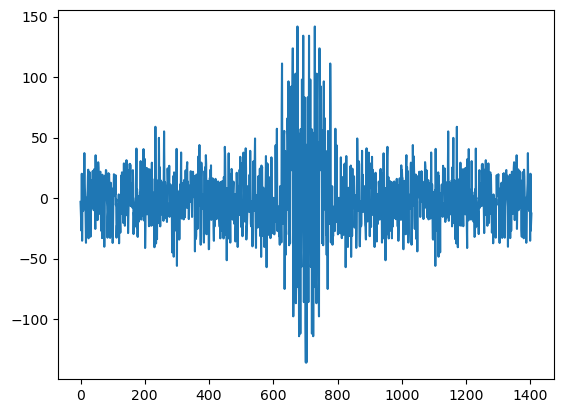

In [24]:
plt.plot(dft)

/Users/jkent/miniconda3/envs/geocat_sandbox/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jkent/miniconda3/envs/geocat_sandbox/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


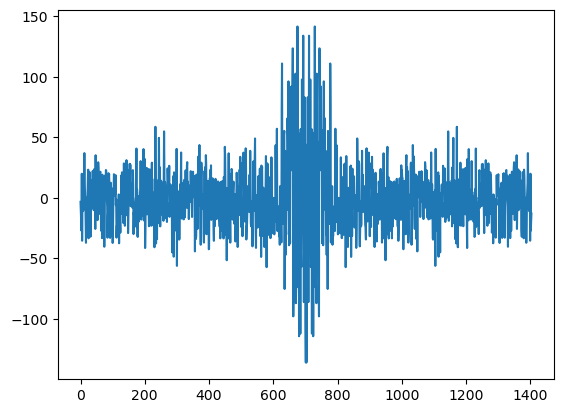

In [25]:
plt.plot(dft_detrend)